In [35]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Link to Notebook:
# https://www.kaggle.com/datasets/desalegngeb/students-exam-scores

# Read the two csv files
df = pd.read_csv('Expanded_data_with_more_features.csv')


## Students Exam Scores: Extended Dataset
## Exam scores for students at a public school

### Data Columns


- **Gender**: Gender of the student (male/female)
- **EthnicGroup**: Ethnic group of the student (group A to E)
- **ParentEduc**: Parent(s) education background (from some_highschool to master's degree)
- LunchType: School lunch type (standard or free/reduced)
- TestPrep: Test preparation course followed (completed or none)
- ParentMaritalStatus: Parent(s) marital status (married/single/widowed/divorced)
- PracticeSport: How often the student parctice sport (never/sometimes/regularly))
- IsFirstChild: If the child is first child in the family or not (yes/no)
- NrSiblings: Number of siblings the student has (0 to 7)
- TransportMeans: Means of transport to school (schoolbus/private)
- WklyStudyHours: Weekly self-study hours(less that 5hrs; between 5 and 10hrs; more than 10hrs)
- **MathScore**: math test score(0-100)
- **ReadingScore**: reading test score(0-100)
- **WritingScore**: writing test score(0-100)


In [36]:
# print the first and last 5 rows
df.head()

,ID,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [37]:
# check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [38]:
# check the data statistics
df.describe()

,ID,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [39]:
# check for missing values
df.isnull().sum()

ID                        0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [40]:
df.columns

Index(['ID', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')

In [41]:
# Combine all the scores into one column. 
# I feel this gives a better representation of the student's performance vs just one score.
df['TotalScore'] = (df['MathScore'] + df['ReadingScore'] + df['WritingScore']) / 3

## Hypothesis Scenario

Investigating whether there is a significant difference in students total average scores between male and female students.
I also would like to look at the total average based on factors like ethnicity and parent education.

- - H0: There is no significant difference in total average scores between male and female students.

- - H1: There is a significant difference in total average scores betweenmale and female students.

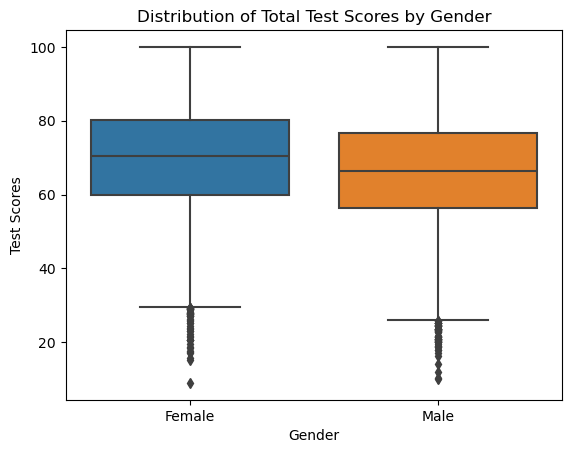


Male Scores:
 count    15217.000000
mean        66.281615
std         14.376135
min         10.000000
25%         56.333333
50%         66.333333
75%         76.666667
max        100.000000
Name: TotalScore, dtype: float64

Female Scores:
 count    15424.000000
mean        69.930109
std         14.302235
min          9.000000
25%         60.000000
50%         70.333333
75%         80.333333
max        100.000000
Name: TotalScore, dtype: float64


In [48]:
# Replace the female and male in the dataset with 0 and 1
df['Gender'] = df['Gender'].replace({'female': 0, 'male': 1})

# Perform the t-test
male_scores = df[df['Gender'] == 1]['TotalScore']
female_scores = df[df['Gender'] == 0]['TotalScore']
t_stat, p_value = stats.ttest_ind(male_scores, female_scores)

# Visualize the data
sns.boxplot(x='Gender', y='TotalScore', data=df)
plt.xlabel('Gender')
plt.ylabel('Test Scores')
plt.xticks([0, 1], ['Female', 'Male'])
plt.title('Distribution of Total Test Scores by Gender')
plt.show()
print("\nMale Scores:\n", male_scores.describe())
print("\nFemale Scores:\n", female_scores.describe())

Visualizing the data, we can see that the distribution of total average scores between male and females is different with males having a lower score. But If we analyze the p value we can see for sure.

In [43]:
# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("The p-value is", p_value, "which is less than", alpha)
    print("Reject the null hypothesis.")
    print("There is a significant difference in average test scores between male and female students.")
else:
    print("The p-value is", p_value, "which is greater than", alpha)
    print("Fail to reject the null hypothesis.")
    print("There is no significant difference in average test scores between male and female students.")

The p-value is 5.381429814273551e-109 which is less than 0.05
Reject the null hypothesis.
There is a significant difference in average test scores between male and female students.


#### There is a difference in Male and Femal Test Scores

- Females score higher on average than males.

## Looking at the total average scores by ethnic group

<function matplotlib.pyplot.xlabel(xlabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['left', 'center', 'right'] | None" = None, **kwargs) -> 'Text'>

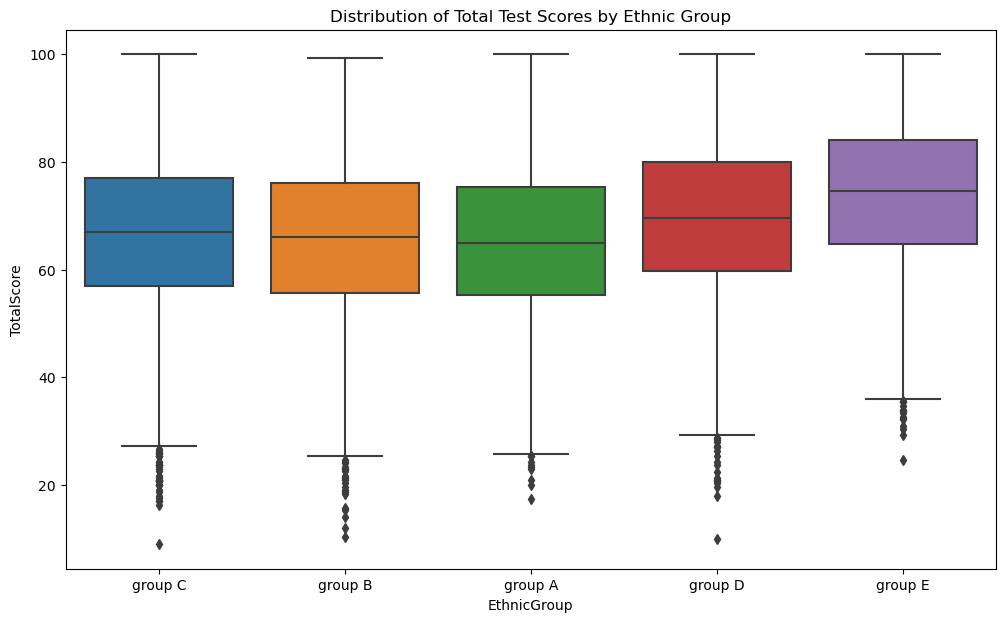

In [49]:
# 'EthnicGroup' groups are coded as group A, group B, group C, group D, and group E
group_A_scores = df[df['EthnicGroup'] == 'group A']['TotalScore']
group_B_scores = df[df['EthnicGroup'] == 'group B']['TotalScore']
group_C_scores = df[df['EthnicGroup'] == 'group C']['TotalScore']
group_D_scores = df[df['EthnicGroup'] == 'group D']['TotalScore']
group_E_scores = df[df['EthnicGroup'] == 'group E']['TotalScore']
f_stat, p_value = stats.f_oneway(group_A_scores, group_B_scores, group_C_scores, group_D_scores, group_E_scores)

# Visualize the data
plt.figure(figsize=(12, 7))
sns.boxplot(x='EthnicGroup', y='TotalScore', data=df)
plt.title('Distribution of Total Test Scores by Ethnic Group')
plt.xlabel

In [45]:
# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("The p-value is", p_value, "which is less than", alpha)
    print("Reject the null hypothesis.")
    print("There is a significant difference in average test scores the ethnicity of the students.")
else:
    print("The p-value is", p_value, "which is greater than", alpha)
    print("Fail to reject the null hypothesis.")
    print("There is no significant difference in average test scores between the ethnicity of the students.")

The p-value is 1.6989147864530418e-250 which is less than 0.05
Reject the null hypothesis.
There is a significant difference in average test scores the ethnicity of the students.


#### We can see that there is a significant difference in math scores between ethnicities.

1.) Group E

2.) Group D

3.) Group C

4.) Group B

5.) Group A

## Now looking at the average test scores by parent education

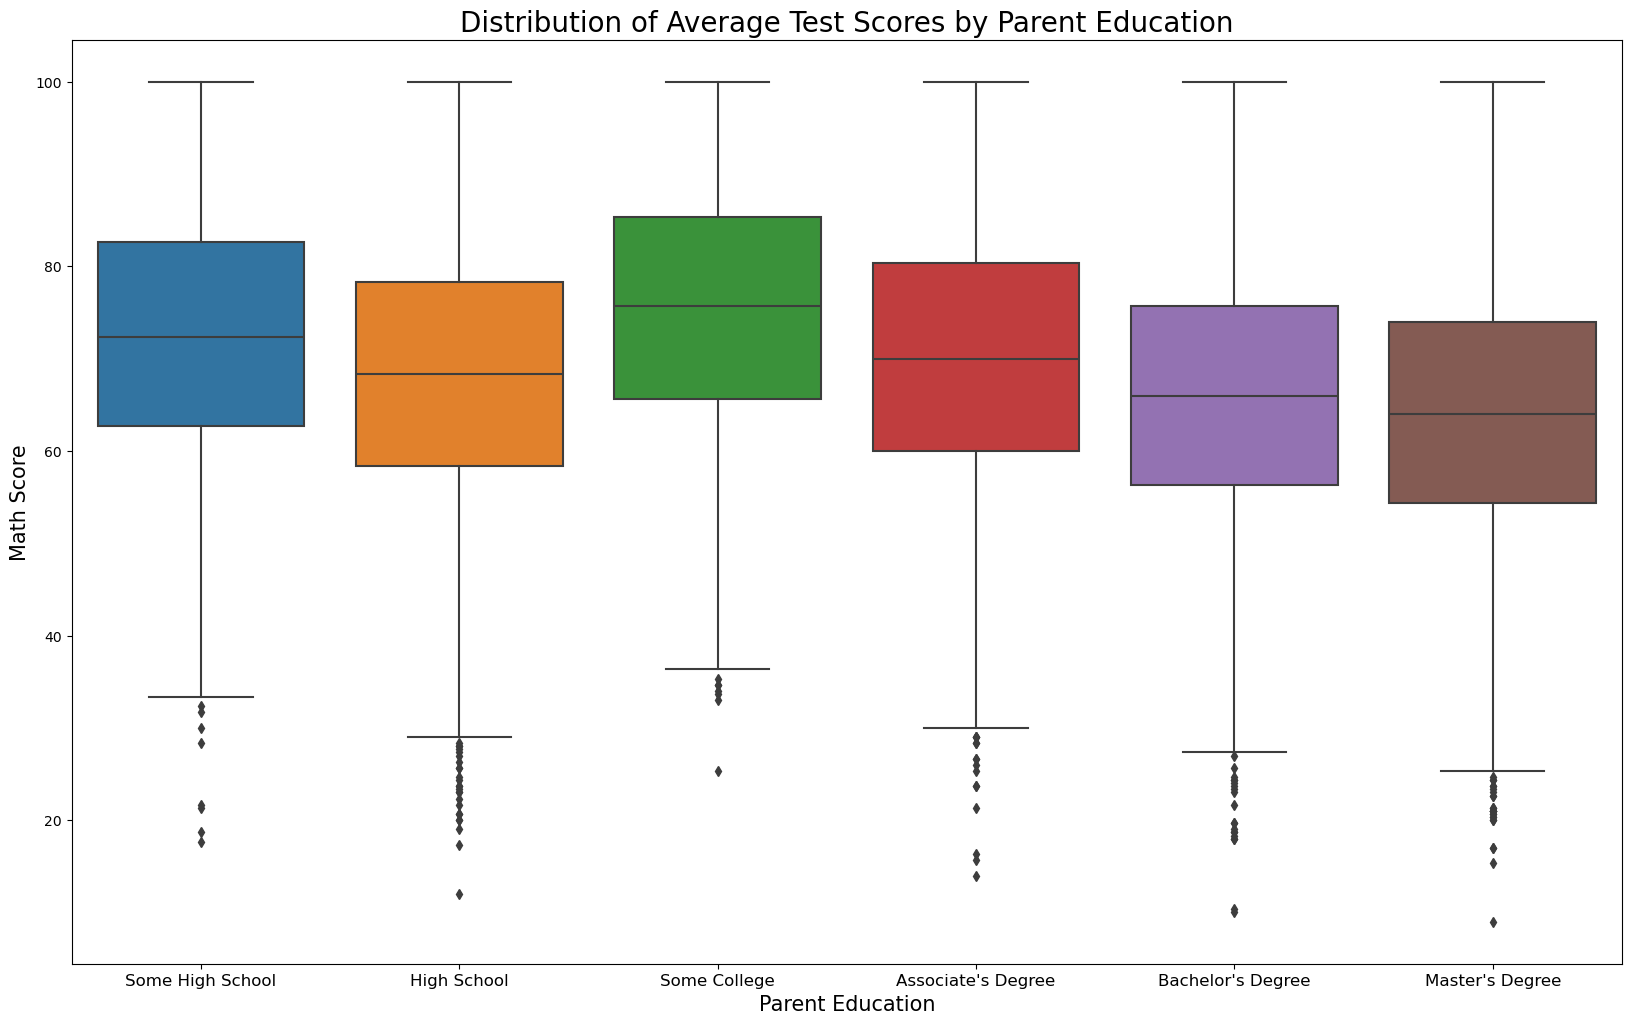

In [46]:
# 'ParentEduc' is labeled as some high school, high school, some college, associate's degree, bachelor's degree, and master's degree
some_highschool_scores = df[df['ParentEduc'] == "some high school"]['TotalScore']
highschool_scores = df[df['ParentEduc'] == "high school"]['TotalScore']
some_college_scores = df[df['ParentEduc'] == "some college"]['TotalScore']
associates_scores = df[df['ParentEduc'] == "associate's degree"]['TotalScore']
bachelors_scores = df[df['ParentEduc'] == "bachelor's degree"]['TotalScore']
masters_scores = df[df['ParentEduc'] == "master's degree"]['TotalScore']
f_stat, p_value = stats.f_oneway(some_highschool_scores, highschool_scores, some_college_scores, associates_scores, bachelors_scores, masters_scores)

# Visualize the data
plt.figure(figsize=(20, 12))
sns.boxplot(x='ParentEduc', y='TotalScore', data=df)
plt.xlabel('Parent Education', fontsize=15)
plt.ylabel('Math Score', fontsize=15)
plt.xticks([0, 1, 2, 3, 4, 5], ['Some High School', 'High School', 'Some College', "Associate's Degree", "Bachelor's Degree", "Master's Degree"], fontsize=12)
plt.title('Distribution of Average Test Scores by Parent Education', fontsize=20)
plt.show()

In [47]:
# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("The p-value is", p_value, "which is less than", alpha)
    print("Reject the null hypothesis.")
    print("There is a significant difference in average test scores between the parent education levels.")
else:
    print("The p-value is", p_value, "which is greater than", alpha)
    print("Fail to reject the null hypothesis.")
    print("There is no significant difference in average test scores between the parent education levels.")

The p-value is 1.22415965e-315 which is less than 0.05
Reject the null hypothesis.
There is a significant difference in average test scores between the parent education levels.


#### We can see that there is a significant difference in math scores between parent education levels.

1.) Some College

2.) Some High School

3.) Associate's Degree

4.) High School

5.) Bachelor's Degree

6.) Master's Degree

# Conclusion

- We have seen a significant difference in average test scores based on Gender, Ethnicity and Parent Education. 
- One area I was surprised with was that higher parent education didn't directly translate to higher test scores.
- I would like to explore more on the relationship between the parent education and the math scores.
- I would also like to explore the other factors and their relationship with the test scores. 

